In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from statistics import mode
import warnings
warnings.filterwarnings("ignore")

## Import datasets

In [2]:
data_df = pd.read_csv("diabetes.csv")
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
data_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
data_df.shape

(768, 9)

In [5]:
data_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Check for missing values

In [6]:
data_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Train test split

In [7]:
ind_features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
target = ["Outcome"]

In [8]:
X = data_df[ind_features]
y = data_df[target]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

## Custom KNN Classifier

In [10]:
class custom_KNN_classifier():
    """
    #initialie KNN with distance metric "euclidean" or "manhattan"
    """
    def __init__(self,distance_metric):
        self.distance_metric = distance_metric
    
    #getting distance metric between a given training point and a test point
    def get_distance(self,train_data_point,test_data_point):
        
        if self.distance_metric == "euclidean":
            dist = 0
            for i in range(train_data_point.shape[0]): #iterating through the columns training set
                dist += (train_data_point[i]-test_data_point[i])**2
                euclidean_dist = np.sqrt(dist)
                
            return euclidean_dist
        else:
            dist = 0
            for i in range(train_data_point.shape[1]): #iterating through the columns training set
                dist += np.abs(train_data_point[i]-test_data_point[i])
                manhattan_dist = dist
            
            return manhattan_dist
    
    #get the K nearest neighbours
    def nearest_neighbours(self,X_train,y_train, test_data_point, k):
        
        #compute the distances from all training points to the test data point
        distance_list =[]
        indexes = list(X_train.index)
        
        for i in range(len(X_train)):
            distance = self.get_distance(X_train.iloc[i,:].values,test_data_point)
            distance_list.append((indexes[i], distance))
            
        distance_list.sort(key = lambda x:x[1])
        
        neighbors_list = []
        
        for i in range(k):
            
            index = distance_list[i][0]
            neighbors = pd.concat([X_train.loc[index], y_train.loc[index]]).values
            neighbors_list.append(neighbors) # appending the nearest X_train datapoints
        
        return neighbors_list
     
    
    def predict(self,X_train,y_train,test_data_point,k):
        
        neighbors = self.nearest_neighbours(X_train,y_train, test_data_point, k)
        label = []
        for data in neighbors:
            label.append(data[-1])

        predicted_class = mode(label)
        return predicted_class

In [11]:
k = custom_KNN_classifier(distance_metric="euclidean")

## Predict target for a single test data point

In [12]:
k.predict(X_train,y_train,X_test.iloc[0,:],5)

0.0

In [13]:
y_test.iloc[0]

Outcome    0
Name: 668, dtype: int64

## Sklearn KNN classifier

In [14]:
knn = KNeighborsClassifier(n_neighbors=5,p=2)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [15]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

print("Training accuracy",np.round(accuracy_score(y_train,y_train_pred),2))
print("Testing accuracy",np.round(accuracy_score(y_test,y_test_pred),2))

Training accuracy 0.8
Testing accuracy 0.66


## Overfitting
## Lets find the optimum k value

In [17]:
metrics={"k":[],"train_acc":[],"test_acc":[]}
k = list(range(1,16))
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i,p=2)
    knn.fit(X_train,y_train)
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    Training_accuracy = np.round(accuracy_score(y_train,y_train_pred),2)
    Testing_accuracy = np.round(accuracy_score(y_test,y_test_pred),2)
    metrics["k"].append(i)
    metrics["train_acc"].append(Training_accuracy)
    metrics["test_acc"].append(Testing_accuracy)

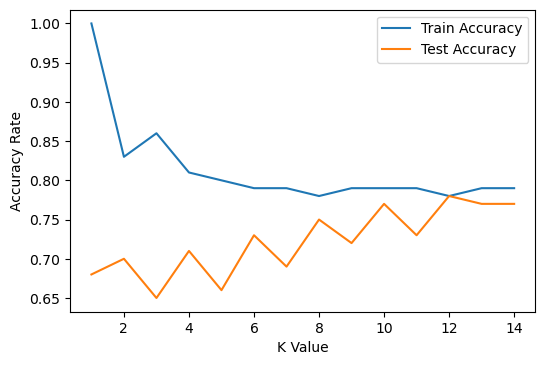

In [21]:
plt.figure(figsize=(6,4),dpi=100)
plt.plot(metrics["k"],metrics["train_acc"],label='Train Accuracy')
plt.plot(metrics["k"],metrics["test_acc"],label='Test Accuracy')
plt.legend()
plt.ylabel('Accuracy Rate')
plt.xlabel("K Value")
plt.show()

In [22]:
#from the above diagram we can infer that at K =12 train acc and test acc are same
knn = KNeighborsClassifier(n_neighbors=12,p=2)
knn.fit(X_train,y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

print("Training accuracy",np.round(accuracy_score(y_train,y_train_pred),2))
print("Testing accuracy",np.round(accuracy_score(y_test,y_test_pred),2))

Training accuracy 0.78
Testing accuracy 0.78


In [30]:
knn = custom_KNN_classifier("euclidean")
y_train_pred=[]
y_test_pred=[]

for i in range(len(X_train)):
    label_train = knn.predict(X_train,y_train,X_train.iloc[i,:],12)
    y_train_pred.append(label_train)
    
for i in range(len(X_test)):
    label_test = knn.predict(X_train,y_train,X_test.iloc[i,:],12)
    y_test_pred.append(label_test)

In [31]:
print("Training accuracy",np.round(accuracy_score(y_train,y_train_pred),2))
print("Testing accuracy",np.round(accuracy_score(y_test,y_test_pred),2))

Training accuracy 0.83
Testing accuracy 0.76


## Custom classifier gives almost the same accuracy as Sklearn KNN model